# Most Used Writer and Directors in Top Studios based on Box Office Sales

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#File Read-in
df_rt = pd.read_csv("Files/rt.movie_info.tsv.gz",sep="\t")
df_rt.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [2]:
#Checking for null values
df_rt.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [3]:
# #removing null values from Box office 
# office_revenue = df_rt[df_rt["box_office"].notnull()]
#removing unnecessary rows 
office_revenue = df_rt.drop(columns=['id', 'synopsis', 'rating', 'dvd_date', 'theater_date', 'runtime'])
office_revenue.head()

,genre,director,writer,currency,box_office,studio
0,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,NaN,NaN,NaN
1,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,$,"600,000",Entertainment One
2,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,NaN,NaN,NaN
3,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,NaN,NaN,NaN
4,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN


In [4]:
office_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   genre       1552 non-null   object
 1   director    1361 non-null   object
 2   writer      1111 non-null   object
 3   currency    340 non-null    object
 4   box_office  340 non-null    object
 5   studio      494 non-null    object
dtypes: object(6)
memory usage: 73.2+ KB


In [5]:
office_revenue.dropna(subset=['box_office'], inplace=True)
office_revenue.fillna(value='Unknown', inplace=True)
office_revenue.head()

,genre,director,writer,currency,box_office,studio
1,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,$,"600,000",Entertainment One
6,Comedy,Jake Kasdan,Mike White,$,"41,032,915",Paramount Pictures
7,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,$,"224,114",Sony Pictures Classics
8,Drama,Taylor Hackford,Mark Jacobson,$,"134,904",Unknown
15,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,$,"1,039,869",ATO Pictures


In [6]:
#Removing commas from box office and converting to int
office_revenue["box_office"] = office_revenue["box_office"].str.replace(",","")
office_revenue["box_office"] = office_revenue["box_office"].astype("int64")
#Converting studio, director and writer to string
office_revenue["studio"] = office_revenue["studio"].astype("string")
office_revenue["director"] = office_revenue["director"].astype("string")
office_revenue["writer"] = office_revenue["writer"].astype("string")
office_revenue.head()

,genre,director,writer,currency,box_office,studio
1,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,$,600000,Entertainment One
6,Comedy,Jake Kasdan,Mike White,$,41032915,Paramount Pictures
7,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,$,224114,Sony Pictures Classics
8,Drama,Taylor Hackford,Mark Jacobson,$,134904,Unknown
15,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,$,1039869,ATO Pictures


In [7]:
#Check data types
office_revenue.dtypes

genre         object
director      string
writer        string
currency      object
box_office     int64
studio        string
dtype: object

In [8]:
#Checking Value Counts
office_revenue["studio"].value_counts().head(30)

Unknown                           35
Universal Pictures                27
Paramount Pictures                20
20th Century Fox                  18
Sony Pictures                     15
Warner Bros. Pictures             14
Sony Pictures Classics            14
Fox Searchlight Pictures           7
New Line Cinema                    7
Warner Bros.                       7
Magnolia Pictures                  6
IFC Films                          6
Columbia Pictures                  6
Roadside Attractions               6
Focus Features                     5
Walt Disney Pictures               5
MGM                                5
Lionsgate Films                    5
Summit Entertainment               5
Paramount Vantage                  4
The Weinstein Company              4
Buena Vista Distribution Compa     3
Open Road Films                    3
Lions Gate Films                   3
Fox Searchlight                    3
A24 Films                          3
Samuel Goldwyn Films               2
L

In [9]:
# Combine duplicated studios
office_revenue.replace("20th Century Fox Distribution","20th Century Fox", inplace=True)
office_revenue.replace("A24","A24 Films", inplace=True)
office_revenue.replace(["Buena Vista Distribution","Buena Vista Distribution Compa","Buena Vista Pictures"],"Buena Vista", inplace=True)
office_revenue.replace("Columbia Tristar Pictures","Columbia Pictures", inplace=True)
office_revenue.replace("Destination Film","Destination Films", inplace=True)
office_revenue.replace(["DreamWorks SKG","Dreamworks Pictures"],"DreamWorks", inplace=True)
office_revenue.replace("Fox Searchlight","Fox Searchlight Pictures", inplace=True)
office_revenue.replace(["Lionsgate Films","Lions Gate Releasing","Lions Gate Films Inc.","Lions Gate","Lions Gate Films","Lionsgate" ],"LionsGate", inplace=True)
office_revenue.replace(["Paramount","Paramount Classics","Paramount Studios","Paramount Vantage","Paramout","Paramout Pictures"],"Paramount Pictures", inplace=True)
office_revenue.replace(["Sony Classics","Sony Pictures Classics","Sony Pictures Entertainment","Sony Pictures Releasing"],"Sony Pictures", inplace=True)
office_revenue.replace("Summit Premiere","Summit Entertainment", inplace=True)
office_revenue.replace(["Universal","Universal Pictures","Universal Pictures Distributio","Universal Pictures International"],"Universal Studios", inplace=True)
office_revenue.replace(["WARNER BROTHERS PICTURES","WB","Warner Bros. Pictures"],"Warner Bros.", inplace=True)
office_revenue.replace(["The Weinstein Co.","The Weinstein Company","Weinstein Co."],"Weinstein Company", inplace=True)
office_revenue.replace("Newmarket Film Group","Newmarket Films", inplace=True)
office_revenue.replace("FilmDistrict","Film District", inplace=True)
office_revenue.replace("IFC First Take","IFC Films", inplace=True)

In [10]:
# movies sort by net revenue
office_revenue_sorted = office_revenue.sort_values(by='box_office', ascending=False)
# top 20 box office studios selected
top_20_box = office_revenue_sorted.iloc[:20]
#reset index
top_20_box = top_20_box.reset_index().drop(columns='index')
top_20_box.head()

,genre,director,writer,currency,box_office,studio
0,Drama,Mel Gibson,Mel Gibson|Benedict Fitzgerald,$,368000000,Newmarket Films
1,Action and Adventure|Science Fiction and Fantasy,Peter Jackson,Peter Jackson|Philippa Boyens|Guillermo del To...,$,303001229,Warner Bros.
2,Action and Adventure|Mystery and Suspense,Sam Mendes,John Logan|Robert Wade|Neal Purvis,$,299300000,MGM
3,Comedy,Jay Roach,Jim Herzfeld|John Hamburg,$,279167575,Universal Studios
4,Kids and Family|Science Fiction and Fantasy,Chris Columbus,Steve Kloves,$,261835892,Warner Bros.


In [12]:
# Declaring new variable to split genre data into separate columns
string_split_rev = top_20_box
# splitting genre values into new columns
genre_split_rev = string_split_rev["genre"].str.split("|", n = 3, expand = True)
# concatination genre columns into 1 series
top_20_box_genres = pd.concat([genre_split_rev[0], genre_split_rev[1], genre_split_rev[2]])
# counting genre counts in top 100 movie list
top_20_box_genre_counts = top_20_box_genres.value_counts()
top_20_box_genre_counts

Action and Adventure           10
Science Fiction and Fantasy     8
Comedy                          8
Drama                           5
Mystery and Suspense            4
Romance                         3
Kids and Family                 1
dtype: int64

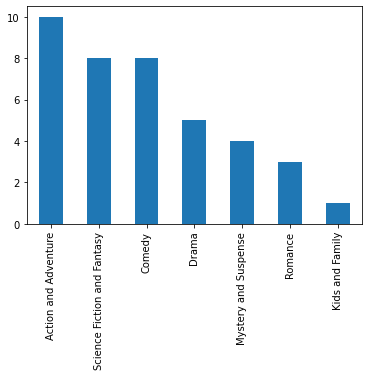

In [13]:
top_20_box_genre_counts.plot(kind='bar');